In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import normalize, MinMaxScaler
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric, plot_forecast_component
import numpy as np

In [28]:
def get_values(n):
    #Return real values from logarithm conversion
    return 10**n

In [2]:
df = pd.read_excel(r'.\dataset\data_raw.xlsx')
df.y = df.y.astype('int32')
df.y = np.log10(df.y)

In [5]:
#df.y = MinMaxScaler().fit_transform(df.y.values.reshape(-1,1))

In [7]:
df_model = pd.DataFrame(df, columns = ['ds', 'y'])
#df_model = df_model.drop(df_model[df_model.y<6].index)
df_model.tail()

,ds,y
1320,12/11/2019,6.690593
1321,13/11/2019,6.661638
1322,14/11/2019,6.623337
1323,15/11/2019,6.565718
1324,16/11/2019,6.285194


In [8]:
# Modelling

In [9]:
#Create seaons and xmas dataframes for later input to the model
seasons = pd.DataFrame({
    'holiday':'seasons',
    'ds': pd.to_datetime(['2018-03-16',
                        '2018-04-13',
                        '2018-04-14',
                        '2018-04-15',
                        '2018-04-21',
                        '2018-04-22',
                        '2018-05-04',
                        '2018-05-05',
                        '2018-05-06',
                        '2018-05-07',
                        '2018-05-19',
                        '2018-05-25',
                        '2018-05-26',
                        '2018-05-27',
                        '2018-05-28',
                        '2018-06-21',
                        '2018-06-22',
                        '2018-06-23',
                        '2018-06-24',
                        '2018-07-26',
                        '2018-07-27',
                        '2018-07-28',
                        '2018-07-29',
                        '2018-07-30',
                        '2018-07-31',
                        '2018-08-03',
                        '2018-08-04',
                        '2018-08-05',
                        '2018-08-05',
                        '2018-08-06',
                        '2018-08-07',
                        '2018-08-08',
                        '2018-08-09',
                        '2018-08-10',
                        '2018-08-11',
                        '2018-08-12',
                        '2018-08-13',
                        '2018-08-14',
                        '2018-08-15',
                        '2018-08-16',
                        '2018-08-17',
                        '2018-08-18',
                        '2018-08-19',
                        '2018-08-20',
                        '2018-08-21',
                        '2018-08-22',
                        '2018-08-23',
                        '2018-08-23',
                        '2018-08-24',
                        '2018-08-24',
                        '2018-08-24',
                        '2018-08-25',
                        '2018-08-25',
                        '2018-08-25',
                        '2018-08-26',
                        '2018-08-26',
                        '2018-08-26',
                        '2018-08-27',
                        '2018-08-27',
                        '2018-08-28',
                        '2018-09-23',
                        '2018-09-24',
                        '2018-09-25',
                        '2018-09-26',
                        '2018-09-30',
                        '2018-10-01',
                        '2018-10-02',
                        '2018-10-03',
                        '2018-11-03',
                        '2018-11-10',
                        '2018-11-10',
                        '2018-11-17',
                        '2018-11-17',
                        '2018-11-24',
                        '2018-11-24',
                        '2019-02-02',
                        '2019-02-09',
                        '2019-02-10',
                        '2019-03-09',
                        '2019-03-09',
                        '2019-04-19',
                        '2019-04-20',
                        '2019-04-21',
                        '2019-04-22',
                        '2019-05-03',
                        '2019-05-04',
                        '2019-05-05',
                        '2019-05-06',
                        '2019-05-24',
                        '2019-05-25',
                        '2019-05-26',
                        '2019-05-27',
                        '2019-08-23',
                        '2019-08-24',
                        '2019-08-25',
                        '2019-08-26'])
                        })

xmas = pd.DataFrame({
    'holiday':'xmas',
    'ds':pd.to_datetime(['2016-12-19',
                        '2016-12-20',
                        '2016-12-21',
                        '2016-12-22',
                        '2016-12-23',
                        '2016-12-24',
                        '2016-12-25',
                        '2016-12-26',
                        '2016-12-27',
                        '2016-12-28',
                        '2016-12-29',
                        '2016-12-30',
                        '2016-12-31',
                        '2017-01-01',
                        '2017-01-02',
                        '2017-01-03',
                        '2017-01-04',
                        '2017-01-05',
                        '2017-01-06',
                        '2017-01-07',
                        '2017-01-08',
                        '2017-12-19',
                        '2017-12-20',
                        '2017-12-21',
                        '2017-12-22',
                        '2017-12-23',
                        '2017-12-24',
                        '2017-12-25',
                        '2017-12-26',
                        '2017-12-27',
                        '2017-12-28',
                        '2017-12-29',
                        '2017-12-30',
                        '2017-12-31',
                        '2018-01-01',
                        '2018-01-02',
                        '2018-01-03',
                        '2018-01-04',
                        '2018-01-05',
                        '2018-01-06',
                        '2018-01-07',
                        '2018-12-19',
                        '2018-12-20',
                        '2018-12-21',
                        '2018-12-22',
                        '2018-12-23',
                        '2018-12-24',
                        '2018-12-25',
                        '2018-12-26',
                        '2018-12-27',
                        '2018-12-28',
                        '2018-12-29',
                        '2018-12-30',
                        '2018-12-31',
                        '2019-01-01',
                        '2019-01-02',
                        '2019-01-03',
                        '2019-01-04',
                        '2019-01-05',
                        '2019-01-06',
                        '2019-12-19',
                        '2019-12-20',
                        '2019-12-21',
                        '2019-12-22',
                        '2019-12-23',
                        '2019-12-24',
                        '2019-12-25',
                        '2019-12-26',
                        '2019-12-27',
                        '2019-12-28',
                        '2019-12-29',
                        '2019-12-30',
                        '2019-12-31',
                        '2020-01-01',
                        '2020-01-02',
                        '2020-01-03',
                        '2020-01-04',
                        '2020-01-05'])
                        })

holidays = pd.concat([seasons, xmas])

In [1]:
#Create model and add holidays dataframe and country bank holidays, then fit the model.

np.random.seed(7)
m = Prophet(weekly_seasonality=True, holidays = holidays)
m.add_country_holidays(country_name='GB')
m.fit(df_model)

NameError: name 'm' is not defined

In [11]:
future = m.make_future_dataframe(periods=365)

,ds
1685,2020-12-06
1686,2020-12-07
1687,2020-12-08
1688,2020-12-09
1689,2020-12-10


In [12]:
forecast = m.predict(future)

In [ ]:
#Add accuracy metrics here

# Plots

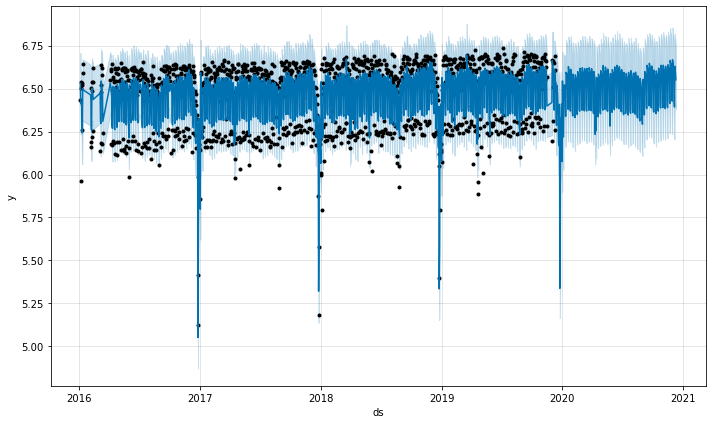

In [13]:
fig1 = m.plot(forecast)

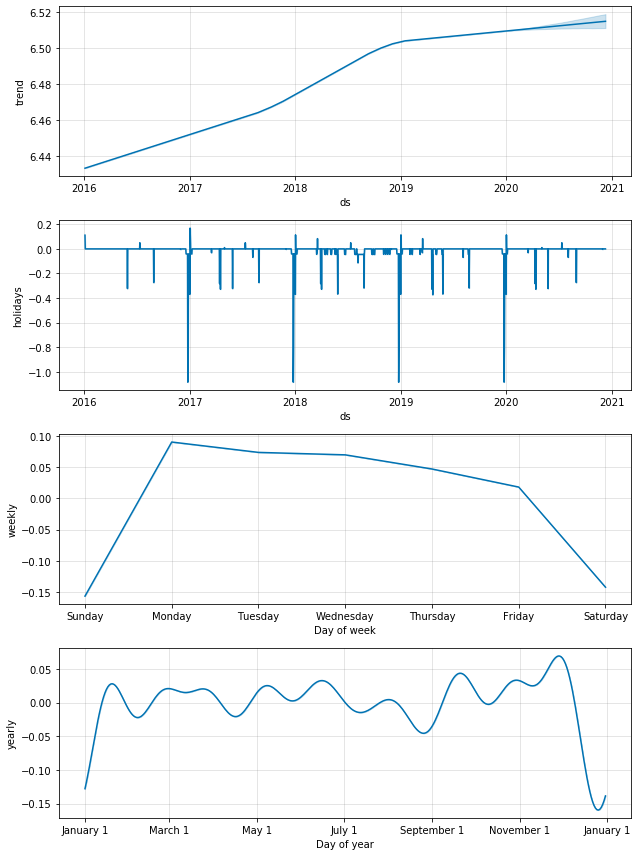

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
#Cross Validation
#Explain this

In [18]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2018-06-14 00:00:00 and 2018-12-11 00:00:00
C:\Users\raul.barrue\AppData\Local\Continuum\miniconda3\envs\datascience\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\raul.barrue\AppData\Local\Continuum\miniconda3\envs\datascience\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [19]:
df_p = performance_metrics(df_cv, rolling_window = 0.1)
df_p.head(20)

,horizon,mse,rmse,mae,mape,coverage
0,35 days,0.018789,0.137074,0.098323,0.015481,0.826087
1,36 days,0.018794,0.137092,0.098370,0.015488,0.826087
2,37 days,0.018604,0.136397,0.097730,0.015384,0.826087
3,38 days,0.018523,0.136101,0.097469,0.015341,0.826087
4,39 days,0.018793,0.137088,0.098667,0.015535,0.826087
5,40 days,0.018867,0.137357,0.099360,0.015648,0.826087
6,41 days,0.018836,0.137243,0.098891,0.015575,0.826087
7,42 days,0.018806,0.137136,0.098607,0.015531,0.826087
8,43 days,0.018809,0.137145,0.098758,0.015551,0.826087
9,44 days,0.018674,0.136654,0.097689,0.015381,0.826087


In [2]:
fig3 = plot_cross_validation_metric(df_cv, metric='mae')
plt.title('MAE');

ModuleNotFoundError: No module named 'matplotlib'

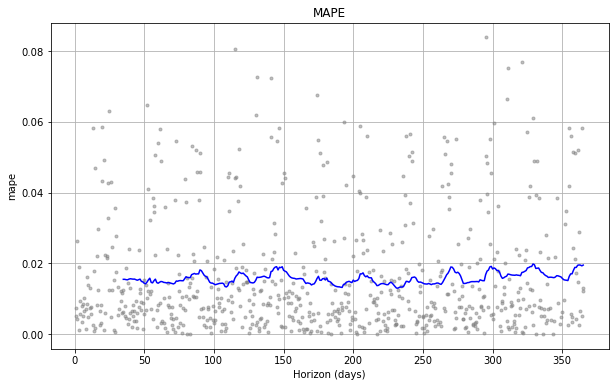

In [21]:
fig4 = plot_cross_validation_metric(df_cv, metric='mape')
plt.title('MAPE');

In [22]:
print("MAPE: {}".format(df_p.mape.mean(),1))
print("MAE: {}".format("{:,}".format(float(df_p.mae.mean()))))

MAPE: 0.0157648937262675
MAE: 0.10092018986347387


In [30]:
mape_values = get_values(df_p.mape)
mae_values = get_values(df_p.mae)
print("MAPE values: {}".format(mape_values.mean(),1))
print("MAE values: {}".format("{:,}".format(float(mae_values.mean()))))

MAPE values: 1.0369734591177056
MAE values: 1.2619113985761328
